In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd

import scipy
from scipy import stats
from scipy.special import comb
from scipy.stats import binom

import operator
from pylab import rcParams
from itertools import islice

from sklearn import neighbors, datasets, tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
hands on ml2
https://github.com/ageron/handson-ml2

SyntaxError: invalid syntax (<ipython-input-2-cf95ddd54c48>, line 1)

# Gradient Descent 

Gradient Descent is an optimizing algorithm used in Machine/ Deep Learning algorithms. The goal of Gradient Descent is to minimize the objective convex function f(x) using iteration.

explain how gradient descent works
minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

1) figure out which direction we can change the coefficients to make  
L smaller. (how? partials.)    
2) We adjust the coefficients slightly in the direction, (how? learning rate!)    
3) recalculate the direction, re-adjust, and repeat, again and again until we converge.    

limitations of gradient descent:         
in is dependent on size of step. Too small takes a long time and too big might overshoot and will take many iterations to find minimum or may not find at all. 
     
   
challenges of gradient descent:        
it requires all the data to be in memory at each step. That is a problem for Big Data situations when you have more data then can fit in memory.             
only finds local extrema          
static(what if you were getting data continuously?)      
     

use gradient descent to optimize the cost function for regression


explain the advantage of stochastic gradient descent 
Stochastic Gradient Descent (SGD):       
makes a step for each data point so only one is needed in memory at the same time.      
with mini-batch stochastic gradient descent a small number of data points is used for each step    
     
SGD  properties:    
1. allows inline training (can incorporate additional data)     
2. Only requires one observation in memory at once.    
3. the random data points help to prevent local minima.    
4. faster than batch (regular) Gradient Descent on average.   
5. prone to oscillation around optimum   

    
implement stochastic gradient descent (stochastic is how we actually do this)







## Gradient Descent Example

In [18]:
from sklearn.linear_model import LogisticRegression
from src.logistic_regression_functions import predict_proba, predict, cost, gradient
from src.GradientDescent import GradientDescent
from sklearn.datasets import make_classification


In [8]:
#make some random data using sklearn's make_classification module
X, y = make_classification(n_samples= 100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=0)



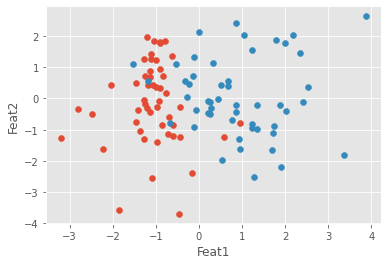

In [9]:
# graph the data with one feature on the x axis and the other on the y axis
fig, ax = plt.subplots()
class1 = X[y == 0]
class2 = X[y == 1]
ax.set_xlabel('Feat1')
ax.set_ylabel('Feat2')
plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1]);

It looks like a decent decision boundary for this data (given that it is of the form y = mx) would pass through the data points $(0, 0)$ and $(-1, 1.5)$. This gives the slope m from the following simple calculation:
$$ m = \frac{1.5 - 0}{-1 - 0} = \frac{1.5}{-1} = -1.5 $$
Let's superimpose this line on the above plot above.

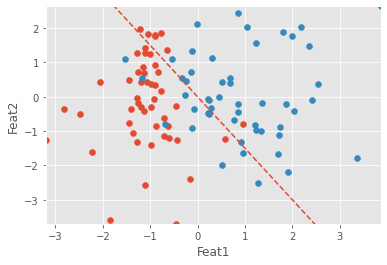

In [25]:

def compute_scatterplot_bounds(X):
    """Compute the axis bounds for a scatterplot from a two column matrix of data.
    
    Parameters
    ----------
    X: ndarray, shape (n_samples, 2)
    """
    x0_bounds = (X[:, 0].min(), X[:, 0].max())
    x1_bounds = (X[:, 1].min(), X[:, 1].max())
    return x0_bounds, x1_bounds

def set_scatterplot_bounds(x0_bounds, x1_bounds, ax):
    """Set the axis bounds on a matplotlib axis.
    
    Parameters
    ----------
    x0_bounds: tuple with two elements.  The bounds on the first axis.
    x1_bounds: tuple with two elements.  The bounds on the second axis.
    ax: matplotlib axis object
    """
    ax.set_xlim(x0_bounds)
    ax.set_ylim(x1_bounds)
def plot_eyeballed_line_no_intercept(X, ax):
    """Add the zero intercept line we eyeballed above to the scatterplot."""
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    ax.plot(t, -1.5*t, linestyle='--', label="Eyeballed Line")
    set_scatterplot_bounds(x0_bounds, x1_bounds, ax)

fig, ax = plt.subplots()
class1 = X[y == 0]
class2 = X[y == 1]
plot_classification_data = ( 
ax.scatter(class1[:,0], class1[:,1]) ,
ax.scatter(class2[:,0], class2[:,1]),
ax.set_xlabel('Feat1'),
ax.set_ylabel('Feat2'));
plot_eyeballed_line_no_intercept(X, ax)

. To verify that your implementations are correct, compute the following _by hand_. Of course, you can use a calculator/google/wolfram alpha/python.

    |                   | feature 1 | feature 2 |   y |
    | ----------------- | --------: | --------: | --: |
    | **x<sub>1</sub>** |         0 |         1 |   1 |
    | **x<sub>2</sub>** |         2 |         2 |   0 |
    | **x<sub>3</sub>** |         3 |         0 |   0 |

    1. Using the data above, compute the **value of the cost function**. Initialize your coefficients: β<sub>1</sub> =1, β<sub>2</sub> =1. For now, assume β<sub>0</sub>=0 (that is, we are not considering an intercept term).
    
        Hint: you will use
        (β<sub>1</sub>x<sub>1,1</sub> + β<sub>2</sub>x<sub>1,2</sub>)
        while computing your hypothesis function for the first data point.

AttributeError: 'AxesSubplot' object has no attribute 'plot_classification_data'

In [14]:
# implement cost function
X_sample = np.array([[0, 1], [2, 2], [3, 0]])
y_sample = np.array([1, 0, 0])
coeffs = np.array([1, 1])

p = predict_proba(X_sample, coeffs)
y_hat = predict(X_sample, coeffs)
# cost = cost(X_sample, y_sample, coeffs)
grad = gradient(X_sample, y_sample, coeffs)

print("The predicted probability vector is {}".format(str(p)))
print("The predicted class vector is {}".format(str(y_hat)))
print("The cost function at these coefficients is {}".format(str(cost)))
print("The gradient of the cost is {}".format(str(grad)))

The predicted probability vector is [0.73105858 0.98201379 0.95257413]
The predicted class vector is [ True  True  True]
The cost function at these coefficients is <function cost at 0x7f7f7edc5c10>
The gradient of the cost is [4.82174996 1.69508616]


In [19]:
# now to implement gradient decent

# Need to include fit_intercept=False, which will be added later in the exercises.
gd = GradientDescent(cost, gradient, predict, 
                     fit_intercept=False, num_iterations=100)
gd.fit(X, y)

Estimated Logistic Coefficients: [2.67126918 0.598687  ]
Predicted Values on Training Data: [False False False  True  True]


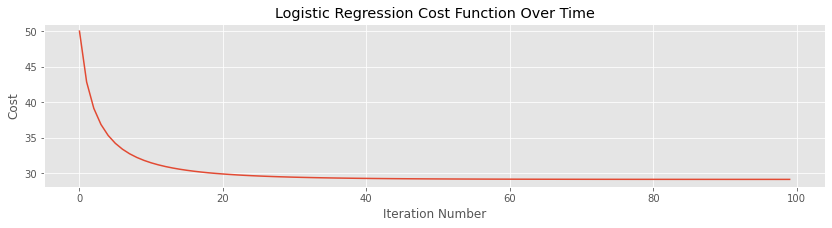

In [22]:
#plot = cost if everything goes well cost history should go down over time. 


def plot_cost(GradientDescent, ax,alpha=1.0):

    """Plot the in sample cost of a gradient descent run over time."""
    ax.plot(range(len(gd.cost_history)), gd.cost_history, alpha=alpha)
    ax.set_title("Logistic Regression Cost Function Over Time")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Cost")

fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(GradientDescent, ax)

print("Estimated Logistic Coefficients: {}".format(str(gd.coeffs)))
print("Predicted Values on Training Data: {}".format(str(gd.predict(X)[:5])))


Looks good!

Now that the model has been fit, we can see the estimated coefficients and the final predictions on the training data.


The coefficients returned from the gradient descent are not the m and b from our earlier eyeball exercise. Indeed, we have not yet included an intercept term in our model, so this coefficient vector really only encodes m.

So why two parameters?

Well, the coefficients here encode two pieces of information:

The slope of the decision boundary.
How rapidly the predicted probability changes as we move away from the decision boundary.

More precisely, the coefficient vector is orthogonal to the decision boundary, and it's length encodes the rate of change of the predicted probabilities.

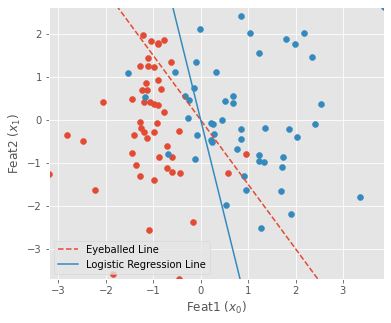

In [39]:
#Let's plot the fit decision boundary along with our eyeballed attempt.
def plot_decision_bdry_no_intercept(X, gd, ax):
    """Plot the decision boundary from a logistic regression that does 
    not contain an intercept term.
    """
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    m = -gd.coeffs[0] / gd.coeffs[1]
    ax.plot(t, m*t, label="Logistic Regression Line")


fig, ax = plt.subplots(1, figsize=(6, 5))

plot_classification_data = ( 
ax.scatter(class1[:,0], class1[:,1]) ,
ax.scatter(class2[:,0], class2[:,1]),
ax.set_xlabel('Feat1 ($x_0$)'),
ax.set_ylabel('Feat2 ($x_1$)'));
plot_eyeballed_line_no_intercept(X, ax)
plot_decision_bdry_no_intercept(X, gd, ax)
ax.legend()





We actually did pretty good here with our straightedge and eyeball method! Even so, a close examination does show the logistic regression line to be superior.      
   
We implemented two new methods in `GradientDescent`, `standardize_data_fit` and `standardize_data_transform`.  We do need **two** methods to prevent data leakage: we must fit the standardizer on our training data, and then reuse the parameters from the training data to standardize and test data.

Luckily, `sklearn` already includes a `StandardScaler` class just for this purpose, our implementation simply composes this with our `GradientDescent` class.

See assignment for further...

# Neural Networks

In [2]:
import tensorflow as tf

In [ ]:
neural network and deep learning will be used interchangeably

neural networks perform well with high-dimensional (unstructured data)such as images, audio, and text

Disadvantages:     
hard to design and tune  
slow to train   
many local minima   
uninterpretable   
easy to overfit(needs lots of data)   
   
Advantages:    
works well with high-dimensional data   
can find almost anything, when designed correctly   
online training   


Explain the basic neural-network algorithms

input layer       hidden layer      output layer
x_1 O                   O
x_2 O                   O                O - y 
x_3 O                   O 
x_4 O     

   
types of layers/neurons
 
the nodes are neurons than can be input, hidden, or output. The input nodes are the features and once all the calculations are done, the value of the output nodes will be predicted labels. 

connections between the nodes can be weighta or activation functions. 
     
Weights - the value for that neuron is the sum over all incoming connects of the weight times the value of the previous neuron.   
     
what are activation functions

Activation Functions:
Sigmoid 
Nice properties: range between 0 and 1 and we want to predict probability as output, differentiable, monotonic
Drawback:
get stuck during training

Hyperbolic Tangent
similar to sigmoid, range is -1 to 1

ReLU
probably most popular
defined as the positive part of its argument:

{\displaystyle f(x)=x^{+}=\max(0,x)}{\displaystyle f(x)=x^{+}=\max(0,x)}
where x is the input to a neuron.
Leaky ReLU
Leaky ReLUs allow a small, positive gradient when the unit is not active.



what are fully connected networks
each layer is fully connected with each node is connected to each node in the previous layer.

Explain the back propagation process
done by using back propagation and is done by using backpropagated gradients using the chain rule and optimixed using an optimization algorithm by comparing the predicted outcome with the expected value for a set of inputs to find the output error, and propogate the error backwards, from one layer to the previous one based on the gradient of the intervening functions and weights.    

Build a simple neural network in keras

## Neural Networks Example

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# remember docker start tensorflow

In [27]:
from src.mlp import load_and_condition_MNIST_data 

In [31]:
X_train, y_train, X_test, y_test, y_train_onehot = load_and_condition_MNIST_data()


Loaded MNIST images

First 5 labels of MNIST y_train: [5 0 4 1 9]

First 5 labels of MNIST y_train (one-hot):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]



In [5]:
X_train[0].shape

# 28**2 = 784

(784,)

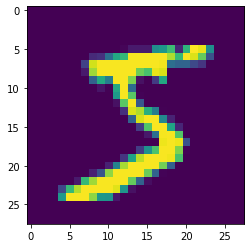

In [20]:
fig, ax = plt.subplots()
ax.imshow(X_train[0].reshape(-1,28), )

In [21]:
np.max(X_train[0])

255.0

In [38]:

clf = DecisionTreeClassifier()
clf.fit(X_train[:10000,:], y_train[:10000])
yhat = clf.predict(X_test)
print(accuracy_score(y_test, yhat))

0.8054


In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(accuracy_score(y_test, yhat))

0.8755


Logistic Regression with Keras

In [33]:
np.random.seed(42)

n_samples, n_feats = X_train.shape

model = Sequential() # sequence of layers

denselayer = Dense(units=1,
                input_dim=n_feats,
                kernel_initializer='uniform',
                activation='sigmoid')

model.add(denselayer)

model.predict(X_test).shape 
# The shape is (10,000,1) because that is one value output per sample in X_test.


(10000, 1)

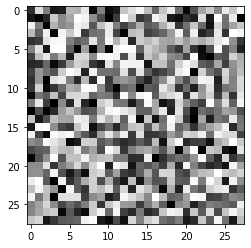

In [15]:
hidden_unit_i = 0
plt.imshow(denselayer.weights[0].numpy()[:,hidden_unit_i].reshape(28,28), cmap="Greys")




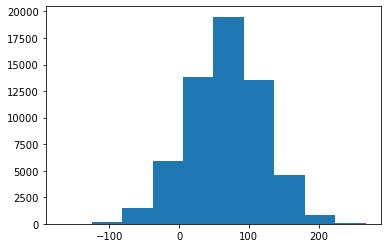

In [13]:
plt.hist(X_train @ model.get_weights()[0]);

# Ok, they're normally distributed... Sooo randomish??

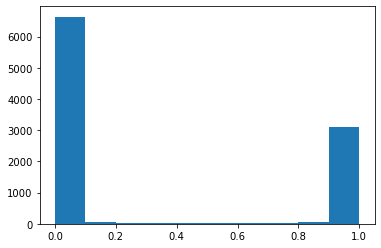

In [24]:
plt.hist(model.predict(X_test));

#the output was random, but then got crunched into the sigmoid function

The output of this model is the activation of a single "neuron" (aka "unit"), as a function of all 784 input pixel features. The output of the neuron is `activation_function( m*x+b )`, where `activation_function` is function specified in the `denselayer` layer, and `m` and `b` are the `.weights` and `.bias` members of the layer. Manually obtain the neuron's weight and bias, and use the pseudocode `activation_function( m*x+b )` to calculate the neuron's response to the first test example `X_test[0]`. 

In [40]:
model.predict(X_test[0].reshape(1,-1))

array([[1.]], dtype=float32)

In [41]:
model.get_layer(index=0).activation

<function tensorflow.python.keras.activations.sigmoid(x)>

In [42]:
model.get_layer(index=0).activation(X_test[0] @ model.get_weights()[0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

Now, find the output of a logistic regression model using m as the beta and X_test[0] as x_i. How to they compare?

In [43]:
def sigma(x):
    return 1 / (1 + 1 / np.exp(x))

sigma(X_test[0] @ model.get_weights()[0])

array([1.], dtype=float32)

The current model can't do multiclass prediction - it can only predict a single thing. Let's use it to predict if an image is a '1'. Create a binary label set `yone_train` and `yone_test` for images that are ones, and then train it like this:

```
from tensorflow.keras.metrics import Precision, Recall
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=[Precision(), Recall()] ) 

model.fit(X_train, yone_train, epochs=10, batch_size=5000, verbose=1,
              validation_split=0.1)
```

Take a look at the `weight` and `bias` parameters of the `denselayer`. Have they changed? Now that you've considered the relationship of this neuron to logistic regression, how would you relate training this model to training a logistic regression model? (Consider taking the neuron's `weight` vector, reshaping it into a square, and rendering an image of it.)

In [45]:
y_train==1
yone_train = y_train==1
yone_test = y_test==1

from tensorflow.keras.metrics import Precision, Recall
model = Sequential() # sequence of layers

denselayer = Dense(units=1,
                input_dim=n_feats,
                kernel_initializer='uniform',
                activation='sigmoid')

model.add(denselayer)

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=[Precision(), Recall(), 'accuracy'] ) 

model.fit(X_train, yone_train, epochs=10, batch_size=5000, verbose=1,
              validation_split=0.1)

Epoch 1/10
11/11 [==============================] - 1s 54ms/step - loss: 137.6115 - precision: 0.5864 - recall: 0.5906 - accuracy: 0.9065 - val_loss: 10.0829 - val_precision: 0.9144 - val_recall: 0.9492 - val_accuracy: 0.9853
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 11.4348 - precision: 0.9207 - recall: 0.9265 - accuracy: 0.9826 - val_loss: 7.4026 - val_precision: 0.9332 - val_recall: 0.9540 - val_accuracy: 0.9880
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 8.9907 - precision: 0.9317 - recall: 0.9357 - accuracy: 0.9850 - val_loss: 5.9426 - val_precision: 0.9405 - val_recall: 0.9540 - val_accuracy: 0.9888
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 7.6002 - precision: 0.9366 - recall: 0.9424 - accuracy: 0.9863 - val_loss: 4.9837 - val_precision: 0.9365 - val_recall: 0.9603 - val_accuracy: 0.9890
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 6.5630 - precision: 0.9418 - reca

In [ ]:
model.weights[0].numpy()[:,hidden_unit_i].reshape(28,28)

In [ ]:
hidden_unit_i = 0
plt.imshow(model.weights[0].numpy()[:,hidden_unit_i].reshape(28,28), cmap="Greys")

> Theres a dark spot in the middle! Looking for that vertical line, and it's very white on the sides.

# Time Series

In [ ]:
  - Define "time series" and "time-series data".
a time series is a specific type of data where measurements of a single quantity are taken over time. 

ex. google trends


  - Identify fundamental concepts in a time series: 
Various different time series often show common patterns. Attaching words to these patterns allows us to build a common language to discuss time series.

trend - a gradual change in average level as time moves on and can be increasing, decreasing, or neither. 

seasonality - a pattern that tends to appear regularly and aligns with features of a calendar. 

stickiness -stickiness coefficient summarizes the extent to which deviations from the mean trajectory tend to co-vary over time. 

########################################################



    
detrended - remove a trend from a time series. When you detrend data you remove an aspect from the data that you think is causing some kind of distortion.

deseasonalize - stripping data of its seasonal patterns is referred to as seasonally adjusted or deseasonalized data.

moving average - creating a new series where the values are comprised of the average of raw observations in the original time series. 

window -   We essentially slide a window of a fixed side across our data, and average the values of the series within the window.

The parameter w controls how far to the left and to the right of  y_i we look when averaging the nearby points, this is called the window.

smaller values of window will tend to be influenced by noise of other non-trend paterns in a series, where large values produce smoother estimates of the general trend in the data. This makes large windows method prefered. 


remainder, error, residual -
I_t, the irregular component (or "noise") at time t, which describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed.

Statistical Concepts:
  Random processes - Let's now impose a probability model on this data, i.e., now we consider series as random objects that can be sampled. When we need to distinguish the data from the statistical model that we are assuming generated the data, we call:

The data are a series.
The data generating process a random process, or more specifically, a time-series random process.

  White noise -
  The simplest possible random process from this perspective occurs when each Y i is independent from all the rest, and all the Y's are identically distributed with a mean of zero.
In this case the series is called white noise.



MA Series  
 - Use the classical decomposition to decompose and then describe a time series.


  
  - Define stationarity, contrast with independence.
Independence
Two events are statistically independent if the occurrence of one does not affect the probability of occurrence of the other. Let 𝐴 and 𝐵 be two events then they are independent if and only if:
𝑃(𝐴∩𝐵)=𝑃(𝐴)𝑃(𝐵)

Stationarity
A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time.
Let 𝑋𝑡 be a stochastic process and 𝐹𝑋 represent the cumulative distribution function of the unconditional joint distribution of 𝑋𝑡, then 𝑋𝑡 is stationary if for all 𝑘, 𝜏 and 𝑡1,...,𝑡𝑘

𝐹𝑋(𝑥𝑡1+𝜏,...,𝑥𝑡𝑘+𝜏)=𝐹𝑋(𝑥𝑡1,...,𝑥𝑡𝑘)






- Identify a stationary time series.
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

 -Random Walks
In mathematics, a random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

 The Augmented Dickey-Fuller test is setup as follows:

H0: The series is not-stationary (specifically, has a unit root).
Ha: The series is stationary.

  - Fit ARIMA models to forecast a stationary time series.

Autocorrelation

partial autocorrelation

autoregressive process


ARMA models have both:

A linear combination of white noise component (the MA), where subsequent values of the series are (partially) a linear combination of white noise.
An autoregressive component the (AR), where subsequent values of the series are (partially) a linear combination of previous terms, plus noise.

An ARIMA(p, d, q) model:
Applies an ARMA model to a series that has been differenced d times.
The AR part of the ARMA model has order p.
The MA part of the ARMA model has order q.

And, one final time, fitting an ARIMA model recovers the coefficients of a simulated ARIMA process.

## Time Series Example

In [46]:
## some datetime conversion warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Always make it pretty
plt.style.use('ggplot')

In [49]:
births = pd.read_csv('src/birth.txt')
births.head(3) # take a look at data

,num_births
0,295
1,286
2,300


Using pandas.date_range() to create a dates variable (from January 1980 and ending December, 2010).

In [53]:
dates= pd.date_range(start= '1980-01-01', end='2010-12-31', freq='M')
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=372, freq='M')

In [58]:
len(dates), births.shape[0] # make sure they line up!

(372, 372)

Create a time variable (range: 1-372) to be used later in the regressions and both a month and year variable (use pd.DatetimeIndex to strip these values from your dates).

In [60]:
time=range(1,372)
month = pd.DatetimeIndex(dates).month 
year = pd.DatetimeIndex(dates).year

#now make dates the index
births.index = dates

In [65]:
births.head(13)

,num_births,month,year
1980-01-31,295,1,1980
1980-02-29,286,2,1980
1980-03-31,300,3,1980
1980-04-30,278,4,1980
1980-05-31,272,5,1980
1980-06-30,268,6,1980
1980-07-31,308,7,1980
1980-08-31,321,8,1980
1980-09-30,313,9,1980
1980-10-31,308,10,1980


In [71]:
births['month'] = month
births['year'] = year
avg = births.groupby(['year'])['num_births'].mean()
avg

year
1980    294.666667
1981    296.166667
1982    296.166667
1983    312.583333
1984    320.416667
1985    325.000000
1986    335.000000
1987    337.166667
1988    347.000000
1989    354.416667
1990    350.333333
1991    353.750000
1992    353.916667
1993    356.750000
1994    347.083333
1995    341.750000
1996    337.750000
1997    313.833333
1998    302.500000
1999    293.916667
2000    290.416667
2001    297.750000
2002    309.916667
2003    296.666667
2004    271.333333
2005    261.500000
2006    263.833333
2007    262.416667
2008    265.583333
2009    275.000000
2010    278.666667
Name: num_births, dtype: float64

In [72]:
statsm = births.groupby(by= births.index.month).mean()
statsm

,num_births,month,year
1,306.225806,1.0,1995.0
2,288.451613,2.0,1995.0
3,308.935484,3.0,1995.0
4,290.580645,4.0,1995.0
5,300.483871,5.0,1995.0
6,304.129032,6.0,1995.0
7,327.870968,7.0,1995.0
8,334.161290,8.0,1995.0
9,330.032258,9.0,1995.0
10,322.838710,10.0,1995.0


In [73]:
#create into time series using Pandas and plot
num_births = pd.Series(births['num_births'], births.index)

It looks like

#Births per month increased from the 80's into the 90's, but then decreased again from the 90's into the 00's.
#There are less births per month in the winter months as compared to the summer months.

#Note though, months generally do not have the same number of days, so there is a risk that we may see effects due to the difference in number of days across months. A better statistic to aggregate would be births per day.

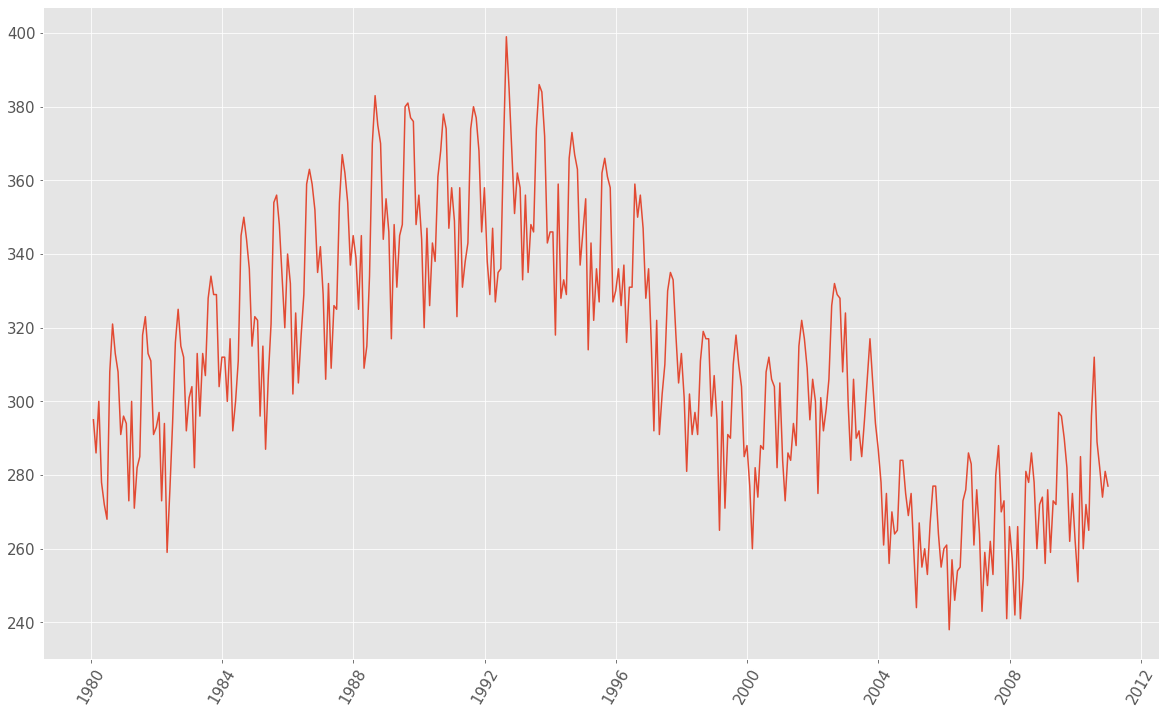

In [75]:
fig, ax = plt.subplots(figsize=(20,12))
y = num_births
x = num_births.index.date
ax.plot(x,y)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=60);

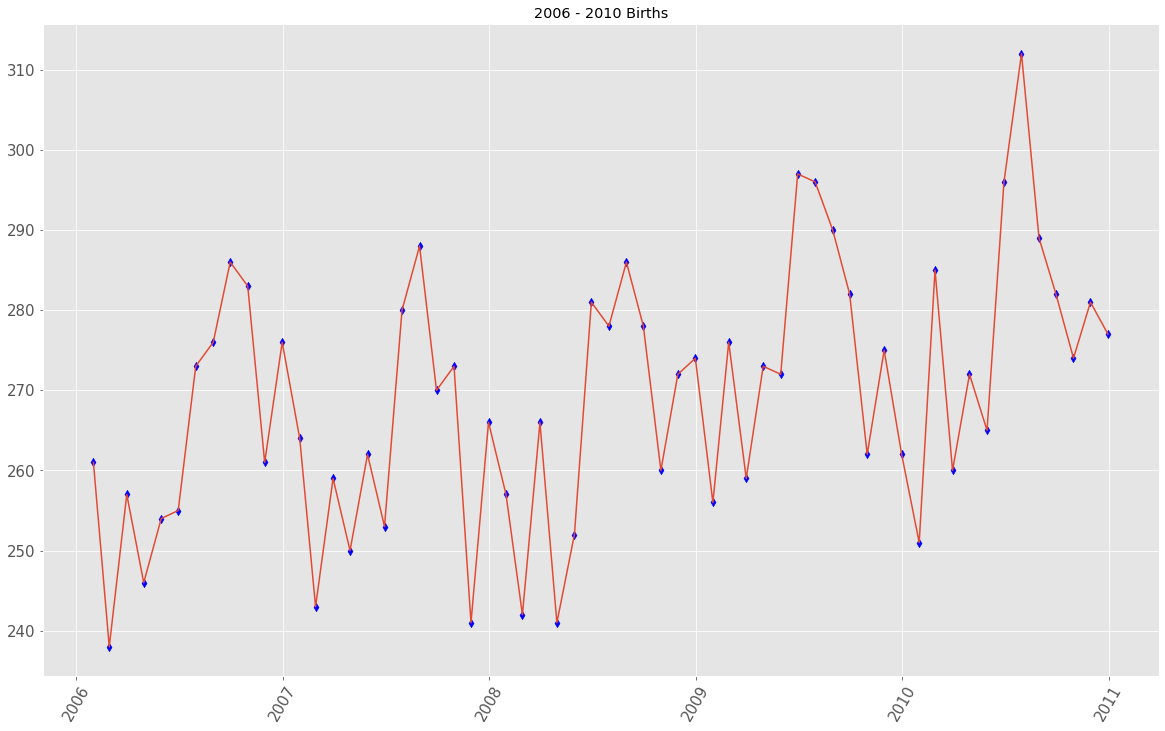

In [102]:
#just 2006 to 2010 - note seasonal pattern

new = num_births[num_births.index.year>=2006]

fig, ax = plt.subplots(figsize=(20,12))
y=new
x=new.index.date
ax.plot(x,y)
ax.scatter(new.index, new, marker='d', color='b')
ax.set_title('2006 - 2010 Births')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=60);

In [95]:
#quarterly means
q =num_births.resample('Q').mean()

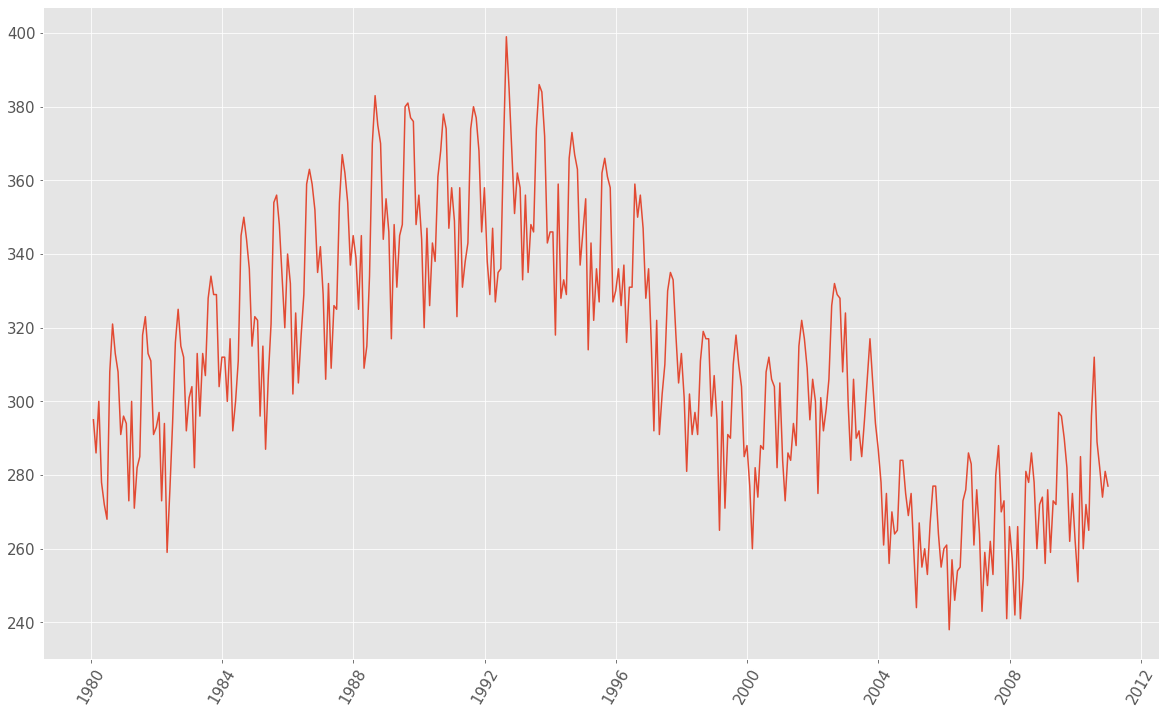

In [96]:
fig, ax = plt.subplots( figsize=(20,12))
y = num_births
x = num_births.index.date
ax.plot(x,y )
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=60);

In [97]:
births['seasonal_means'] = reindex_to_data_frame(seasonal_means, births, 'M')
births['annual_means'] = reindex_to_data_frame(annual_means, births, 'M')

fig, axs = plt.subplots(2, sharey=True, figsize=(14, 6))

births.num_births.plot(ax=axs[0], alpha=0.33)
births.seasonal_means.plot(ax=axs[0])
axs[0].set_title("Seasonal Averages of Births Per Month over Time")

births.num_births.plot(ax=axs[1], alpha=0.33)
births.annual_means.plot(ax=axs[1])
axs[1].set_title("Annual Averages of Births Per Month over Time")

plt.tight_layout()

NameError: name 'reindex_to_data_frame' is not defined

# Decision Trees

In [ ]:
Can apply decision trees to classification/regression problems


types of trees:  
1. Classification Trees:
our outcomes (target, output) are discrete. Leaf values are typically set to the most common outcomes.

2. Regression Trees:
our outcomes (target, output) are continuous. Leaf values are typically set to the mean value in oucomes. In Regression trees we use RSS instead of Gini/Entropy

note: features (inputs, predictors) can be either discrete or continuous for both classification and regression trees.

understand and can calcualte different measurements(Entropy, Gini) for quantifying branching in decision trees

Gini impurity -the sum of(probability of object j in a set being identified correctly multiply by the probability it is identified incorrectly)

Entropy - is nothing but the measure of disorder. (You can think of it as a measure of purity as well. You’ll see. I like disorder because it sounds cooler.) Quantifies randomness

apply methods to avoid overfitting
Overfitting is likely if you build your tree all the way until every leaf is pure.
    
Prepruning ideas (prune while you build the tree):
    ●leaf size: stop splitting when num examples gets small enough
    ●depth: stop splitting at a certain depth
    ●purity: stop splitting if enough of the examples are the same class
    ●gain threshold: stop splitting when the information gain becomes too small
        
Postpruning ideas (prune after you’ve finished building the tree):
    ●merge leaves if doing so decreases test-set error (very similar to how we removed features from our regression models using a function we called EliminateOne)


Recursion
Recursion  uses  the  idea  of  "divide  and  conquer"  to  solve  problems.  It  divides  a complex  problem  you  are  working  on  into  smaller  sub-problems  that  are  easily solved, rather than trying to solve the complex problem directly.Three Laws of Recursion1.A recursive algorithm must have a base case.2.A recursive algorithm must change its state and move toward the base case.3.A recursive algorithm must call itself, recursively.


can apply recursive methods in your programming


What are the pros and cons?
   
Pros    
No feature scaling needed  
Model nonlinear relationships - features can have    different effects at different nodes  
Can do both classification and regression   
Robust   
Highly interpretable (unless we have a ton of features)
Handle non-linear relationships well


    
Cons   
Can be expensive to train - must consider (and discard) many possible splits for each node.   
Often poor predictors because of high variance   



## Decision Tree Example

In [119]:
from collections import Counter

In [129]:
class TreeNode(object):
    '''
    A node class for a decision tree.
    '''
    def __init__(self):
        self.column = None # index of feature to split on
        self.value = None # value of the feature to split on
        self.categorical = True # whether or not node is split on
        self.name = None # feature/class name
        self.left = None # left child
        self.right = None # right child
        self.leaf = False # true if node is leaf
        self. classes = Counter() # if a leaf, a count of all the list of all the classes of the data points that terminate at this leaf.  Can be used to assess how "accurate" an individual leaf is.

    def predict_one(self, x):

        if self.leaf:
            return self.name
        col_value = x[self.column]

        if self.categorical:

            if col_value == self.value:
                return self.left.predict_one(x)
            else:
                return self.right.predict_one(x)
        else:
            if col_value < self.value:
                return self.left.predict_one(x)
            else:
                return self.right.predict_one(x)

    def as_string(self, level=0, prefix=''):
        result= ''
        if prefix:
            index = ' | ' * (level-1)+ ' |->'
            result += index + prefix + '\n'
        indent = "  |   " * level
        result += indent + "  " + str(self.name) + "\n"           
        if not self.leaf:
            if self.categorical:
                left_key = str(self.value)
                right_key = "no " + str(self.value)
            else:
                left_key = ">= " + str(self.value)
                right_key = "< " + str(self.value)
            result += self.left.as_string(level + 1, left_key + ":")
            result += self.right.as_string(level + 1, right_key + ":")
        return result

        
    def __repr__(self):
        return self.as_string().strip()


In [116]:
#CART decision tree algorithn
class DecisionTree(object):

    def __init__(self,  impurity_criterion= 'entropy'):

        self.root = None
        self.feature_names = None
        self.categorical = None

        if impurity_criterion == 'entropy':
            self.impurity_criterion = self._entropy
        else:
            self.impurity_criterion = self._gini

    def fit(self, X, y, feature_names=None):
        if feature_names is None or len(feature_names) != X.shape[1]:
            self.feature_names = np.arange(X.shape[1])
        else:
            self.feature_names = feature_names

        # Create True/False array of whether the variable is categorical
        is_categorical = lambda x: isinstance(x, str) or isinstance(x, bool)
        self.categorical = np.vectorize(is_categorical)(X[0])

        self.root = self._build_tree(X, y)


    def _build_tree(self, X, y):
        node = TreeNode()
        index, value, splits = self._choose_split_index(X, y)

        if index is None or len(np.unique(y)) == 1:
            node.leaf = True
            node.classes = Counter(y)
            node.name = node.classes.most_common(1)[0][0]
        else:
            X1, y1, X2, y2 = splits
            node.column = index
            node.name = self.feature_names[index]
            node.value = value
            node.categorical = self.categorical[index]
            node.left = self._build_tree(X1, y1)
            node.right = self._build_tree(X2, y2)
        return node

    def _entropy(self, y):
        n = y.shape[0]
        summation = 0
        for c_i in np.unique(y):
            prob = np.mean(y == c_i)
            summation += prob * np.log2(prob)
        return -summation

    def _gini(self, y):
        n = y.shape[0]
        summation = 0
        for c_i in np.unique(y):
            prob = np.mean(y == c_i)
            summation += prob**2
        return 1 - summation

    def _make_split(self, X, y, split_index, split_value):
        if self.categorical[split_index]:
            idx = X[:, split_index] == split_value
        else:
            idx = X[:, split_index] < split_value
        return X[idx], y[idx], X[~idx], y[~idx]

    def _information_gain(self, y, y1, y2):
        n = y.shape[0]
        weighted_child_imp = 0
        for y_i in (y1, y2):
            weighted_child_imp += self.impurity_criterion(y_i) * y_i.shape[0] / n
        return self.impurity_criterion(y) - weighted_child_imp

    def _choose_split_index(self, X, y):
        split_index, split_value, splits = None, None, None
        best_gain = 0
        for i in range(X.shape[1]):
            values = np.unique(X[:, i])
            if len(values) <= 1:
                continue
            for value in values:
                X1, y1, X2, y2 = self._make_split(X, y, i, value)
                gain = self._information_gain(y, y1, y2)
                if gain > best_gain:
                    split_index = i
                    split_value = value
                    splits = (X1, y1, X2, y2)
                    best_gain = gain
        return split_index, split_value, splits

    def predict(self, X):
        """Return an array of predictions for the feature matrix X.

        Parameters
        ----------
        X: 2d numpy array
            The feature matrix.

        Returns
        -------
        y: 1d numpy array
            Matrix of predicted labels.
        """
        return np.array([self.root.predict_one(row) for row in X])

    def __str__(self):
        """Return string representation of the Decision Tree."""
        return str(self.root)


In [130]:
def test_tree(filename):
    df = pd.read_csv(filename)
    y = df.pop('Result').values
    X = df.values
    print(X)
    
    tree = DecisionTree()
    tree.fit(X, y, df.columns)
    print(tree)
    print()

    y_predict = tree.predict(X)
    print('{:>26} {:>10} {:>10}'.format("FEATURES", "ACTUAL", "PREDICTED"))
    print('{:>26} {:>10} {:>10}'.format("----------", "----------", "----------"))
    for features, true, predicted in zip(X, y, y_predict):
        print('{!s:>26} {:>10} {:>10}'.format(features, true, predicted))


if __name__ == '__main__':
    test_tree('src/playgolf.csv')


[['sunny' 85 85 False]
 ['sunny' 80 90 True]
 ['overcast' 83 78 False]
 ['rain' 70 96 False]
 ['rain' 68 80 False]
 ['rain' 65 70 True]
 ['overcast' 64 65 True]
 ['sunny' 72 95 False]
 ['sunny' 69 70 False]
 ['rain' 75 80 False]
 ['sunny' 75 70 True]
 ['overcast' 72 90 True]
 ['overcast' 81 75 False]
 ['rain' 71 80 True]]
Outlook
 |->overcast:
  |     Play
 |->no overcast:
  |     Temperature
 |  |->>= 80:
  |     |     Temperature
 |  |  |->>= 75:
  |     |     |     Temperature
 |  |  |  |->>= 71:
  |     |     |     |     Temperature
 |  |  |  |  |->>= 68:
  |     |     |     |     |     Don't Play
 |  |  |  |  |->< 68:
  |     |     |     |     |     Play
 |  |  |  |->< 71:
  |     |     |     |     Don't Play
 |  |  |->< 75:
  |     |     |     Play
 |  |->< 80:
  |     |     Don't Play

                  FEATURES     ACTUAL  PREDICTED
                ---------- ---------- ----------
     ['sunny' 85 85 False] Don't Play Don't Play
      ['sunny' 80 90 True] Don't Play Don't Play


# Random Forests

In [ ]:
 Random  Forest Parameters:
   Total number of trees
   Number of features to use at each split
   Individual decision tree Parameters
         (tree depth, pruning, split criterion, e.t.c)
 
 
 
 * Explain the relationship and difference between bagging and a random forest.
Bagging is when each tree of a random forest randomly samples, with replacement,  from the dataset, resulting in different trees. This allows improved variance without sacrificing bias. 

Bagging injects randomness in the selection of training data
Random Forest uses randomness in both the training data and the features considered at each split
More randomness  ⟶ more decorrelation


 * Explain why bagging/random forests are more accurate than a single decision tree.
 Decision trees consider features individually so their response to various features changes more as data changes. 
Can have high variance. 

Rabdom forests have less correlation , making use of subspace sampling and bagging



 * Explain & construct a random forest (classification or regression).



 * Get feature importances from a random forest.


 
 * Explain how OOB error is calculated and what it estimates.




 ## Agenda

 * Discuss ensemble methods
    combines many week models to form a strong model . multiple models are trained on the data. Each model is different and can be trained on different subsets, in different ways, or even different types of models.  
       
 * Review bias/variance tradeoff
 * Review decision trees
 * Discuss bagging (bootstrap aggregation)
 * Discuss random forests
 * Discuss out-of-bag error
 * Discuss feature importance



 random features chosen at each split
 random forrest makes the column random and bagging makes the rows random



 Pros
   Often give near state-of-the-art performance
   Good out-of-the-box performance
   No feature scaling needed
   Model nonlinear relatipnships

Cons
   can be expensive to train (though can be done in parallel)
   Not interpretable

In [ ]:
machine learning algorythms are built to reproduce the data they were trained on. any bias within the training data will be evident within the algorythm. 

# Gradient Boosted Regressors

XGBoost  - model that preprocesses large scale data in a certain way to increase speed and accuracy with a snall cost in precision.   
      
CatBoost - very good at handling data with a large number of categorical features by placing some minor tweaks to the rules of decision tree splitting.

In [ ]:
# Gradient Boosting 
# Morning Lecture

## Morning Objectives 
 - Define boosting in your own words  
    gradient boosting uses an ensemble of weak producing models, grows the model gradually, and is able to lower the bias and variance.    
       
 - Explain each of the tuning parameters and specifically how they affect the model   
    1. loss - this is the loss function to be minimized at each split, and can have various values depending on if the model is classification or regression. 
         
    2. n_estimators - this is the number of trees to be modeled. Too many can overfit the model. This is best checked through cross validation.    
        
    3. learning_rate - the amount of impact made by each tree. A lower rate helps to make the tiny steps needed, but can be computationally expensive (requires more trees). Too large a rate can result in high variance. 
          * Strategy for Tuning Learning Rate*
            In the initial exploratory phases of modeling, set the learning rate to some large value, say 0.1. This allows you to iterate through ideas quickly.
            When tuning other parameters using grid search, decrease the learning rate to a more sensible value, 0.01 works well.
            When fitting the final production model, set the learning rate to a very small value, 0.001 or 0.0005, smaller is better.
     
    4. max_depth - this is the maximum depth of a tree and helps to control overfitting by allowing the model to learn relations very specific to a particular sample. This can be tuned using cross validation. It is NEVER obvious up front what the best depth is, need to use grid search to determine.
        *Tuning the Tree Depth*
            A larger tree depth allows the model to capture deeper interactions between the predictors, resulting in lower bias
            Causes the model to fit faster, increasing the variance and somewhat combating the effect of the learning rate.
            Allows the model to assume a more complex structure of the same number of trees. This is a blessing (low bias) and curse (high variance).    
               
    5. subsample - controls the sample of data trined on each tree through random sampling. typical values ~0.8 generally work but can be fine tuned. (lowers variance)
    note: default is set to 1.0 so always change it. 

    6.min_samples_split: sets minimum unmber  of samples needed in a node to consider a split. Any node with less samples than this will not be considered for splitting. Too high can lead to underfitting and can be tuned using cross validation.  
      
    7.min_samples_leaf: sets minimum samples needed in a terminal node (leaf). All terminal nodes must contain more samples than this.Helps to control over fitting similar  to min_samples_leaf.
        
    8.min_weight_fraction_leaf: Same as above, but expressed as a fraction of the total number of training samples.   
         
 - Be able to explain what you can (and can't) learn from partial dependence plots and feature importance

Feature Importance from Lecture
Relative Variable Importance: Measures the amount a predictor ”participates” in the model fitting procedure.
The name ”feature importances” is pretty awful. It invites misinterpretation. Don’t reason about things from the names they have been given, make sure the statistic actually answers your question. If your model contains both numeric and binary predictors, the importance metric is biased to assign higher values to the numeric predictors. Try not to compare feature importances across these two classes.Feature importance rankings can have very high variance. Make sure any important conclusions are robust to different RNG seeds and training sets.
Make sure your model only includes trees up to the optimal point. Otherwise you’ll allocate importance to overfitting.
Dominant features should be treated with suspicion. They can often be a sign of data leakage.

Partial Dependence Plots: Visualizations of the effect of a single predictor, averaging out the effects of all the rest. 


 - List advantages and disadvantages of boosting as compared to other models like Random Forest

Pros:
easy to read algorithm 
prediction interpretation easy to handle
prediction capability is more efficient
resilient and avoids overfitting easily

Cons:
very sensitive to outliers
impossible to scale up
computationally expensive



In [ ]:
## Afternoon Objectives
 - Explain how boosting models can change depending on the distribution you're predicting 
      - That is to say, have the model use the loss functions for well behaved distributions

Gradient Logistic Regression: minimizes the binomial deviance(logistic log likelihood) loss function. to fit a Gadient boosted logistic regression, replace the least squares loss function with the log loss and then use the same gradient boosting technique. We are boosting the residual probobilities. 



     - That is to say, have the model use the loss functions for well behaved distributions



     - Gaussian (Regressor), Bernoulli (Classifier), Exponential (Also a Classifier called Adaboost(?!?!) ), Poisson (Regressor for Rate of Countable Events)  
 -
 
 Adaboost is discussed but is more sensitive to outliers. It uses trees with depth of 1 (called 'stumps') 
 
  Be aware of the possibility of creating your own loss function 


            ***Some final words on boosting***
Gradient Boosting is the best off-the-shelf learning algorythm available today. It effortlessly produces accurate models. However, it does have drawbacks. 
    1. Boosting creates very complex models. It can be difficult to extract intuitive, conceptual, or inferential information from them. 
    2. Boosting is difficult to explain (this week may have shown you that) It can be hard to convince business leaders to accept such a black box model. 
    3. Boosted models can be difficult to implement into production environments due to their complexity. 
    4. The sequential nature of the standard boosting algorithm makes it very difficult to parallelize (compared to, for example, random forest). Great progress recently in the form of xgboost and to a lesser degree of accuracy LightGBM. 

00000	total: 205ms	remaining: 124ms
622:	learn: 0.0000000	total: 205ms	remaining: 124ms
623:	learn: 0.0000000	total: 205ms	remaining: 124ms
624:	learn: 0.0000000	total: 205ms	remaining: 123ms
625:	learn: 0.0000000	total: 206ms	remaining: 123ms
626:	learn: 0.0000000	total: 206ms	remaining: 122ms
627:	learn: 0.0000000	total: 206ms	remaining: 122ms
628:	learn: 0.0000000	total: 206ms	remaining: 122ms
629:	learn: 0.0000000	total: 207ms	remaining: 121ms
630:	learn: 0.0000000	total: 207ms	remaining: 121ms
631:	learn: 0.0000000	total: 207ms	remaining: 121ms
632:	learn: 0.0000000	total: 207ms	remaining: 120ms
633:	learn: 0.0000000	total: 207ms	remaining: 120ms
634:	learn: 0.0000000	total: 208ms	remaining: 119ms
635:	learn: 0.0000000	total: 208ms	remaining: 119ms
636:	learn: 0.0000000	total: 208ms	remaining: 119ms
637:	learn: 0.0000000	total: 209ms	remaining: 118ms
638:	learn: 0.0000000	total: 209ms	remaining: 118ms
639:	learn: 0.0000000	total: 209ms	remaining: 118ms
640:	learn: 0.0000000	total: